In [316]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [317]:
import os
os.getcwd()

'/content/drive/My Drive/Colab Notebooks/pagepvtltd_2017/FY_2020-21/GSTR-3B_PDFs'

In [318]:
os.chdir('/content/drive/My Drive/Colab Notebooks')

In [319]:
my_path = os.getcwd()
my_path

'/content/drive/My Drive/Colab Notebooks'

In [ ]:
!pip install pdfplumber
!pip install xlwings
!apt update
!apt install chromium-chromedriver
!pip install selenium

In [ ]:
# # !pip install Pillow==9.0.0
# !pip install Pillow==4.0.0
# !pip install PIL
# !pip install image

In [321]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from getpass import getpass
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
import time
import calendar
from selenium.common.exceptions import NoSuchElementException
import os
from io import BytesIO,StringIO
# import pyautogui
from PIL import Image
# https://stackoverflow.com/questions/69875125/find-element-by-commands-are-deprecated-in-selenium
from selenium.webdriver.common.by import By

In [322]:
import pdfplumber
import pandas as pd
import string
from collections import OrderedDict
from IPython.display import display,Image
from tabulate import tabulate
import os
from openpyxl import load_workbook
from openpyxl.styles.alignment import Alignment
from openpyxl.styles import Alignment
import openpyxl
import xlwings as xw
import datetime
import calendar
import shutil
# !pip3 install openpyxl==2.5.14 

In [323]:
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')

In [324]:
# username = pagepvtltd_2017
# password = 'Srinivas@369'
username = input("Enter Username : ")
password = getpass("Enter Password : ")

Enter Username : pagepvtltd_2017
Enter Password : ··········


In [325]:
fyr=[input("Enter Financial Year :    (for Eg:2017-18)")]
newpath = r"{}/{}/FY_{}/GSTR-3B_PDFs".format(my_path,username,fyr[0]) 
if os.path.exists(r"{}/{}/FY_{}".format(my_path,username,fyr[0]) ):
  alert = input("!!Folder Already Exists....   Do you want to Remove :")
  if alert.lower()=='yes':
    shutil.rmtree(r"{}/{}/FY_{}".format(my_path,username,fyr[0]) )
if not os.path.exists(newpath):
    os.makedirs(newpath)
options.add_experimental_option("prefs",{"download.default_directory":newpath})
newpath

Enter Financial Year :    (for Eg:2017-18)2020-21
!!Folder Already Exists....   Do you want to Remove :yes


'/content/drive/My Drive/Colab Notebooks/pagepvtltd_2017/FY_2020-21/GSTR-3B_PDFs'

In [326]:
Driver = webdriver.Chrome(options=options)

In [327]:
Driver.get('https://www.gst.gov.in/')
Driver.find_element(By.XPATH,"//a[contains(text(),' Login')]").click()
time.sleep(1.5)
Driver.find_element(By.ID,'username').send_keys(username)
time.sleep(1)
Driver.find_element(By.ID,"user_pass").send_keys(password)
time.sleep(1.5)

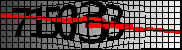

In [328]:
Captcha_Image = Driver.find_element(By.ID,'imgCaptcha').screenshot_as_png
Image(Captcha_Image)

In [329]:
Driver.find_element(By.ID,'captcha').send_keys(int(input("Enter Above Captcha : ")))

Enter Above Captcha : 715033


In [330]:
try:
  time.sleep(2)
  Driver.find_element(By.XPATH,'//button[normalize-space()="Login"]').click()
  time.sleep(2)
  Driver.find_element(By.XPATH,"//div[@class='modal-footer']//a[contains(text(),'Remind me later')]").click()
  time.sleep(2)  
  Driver.find_element(By.XPATH,"//span[text()='Continue to Dashboard']").click()
  time.sleep(4)
  Driver.find_element(By.XPATH,".//div[contains(@id,'main')]//a[contains(text(),'Services ')]").click()
  time.sleep(3)
  Driver.find_element(By.XPATH,"//a[contains(text(),'Returns')]").click()
  time.sleep(4)
  Driver.find_element(By.XPATH,"//div[@class='col-xs-12']//a[contains(text(),'Returns Dashboard')]").click()
except NoSuchElementException:
  print("Not present....continuing script")


In [ ]:
for i in fyr:
    if i in ['2017-18','2018-19','2019-20']:
        Driver.find_element(By.XPATH,f"//select[@name='fin']/option[text()='{i}']").click()
        Months = Driver.find_element(By.NAME,'mon').text.split('\n')
        for m in Months:
            Driver.find_element(By.XPATH,f"//select[@name='mon']/option[text()='{m}']").click()
            time.sleep(1)
            Driver.find_element(By.XPATH,".//div[contains(@class,'col-sm-3 col-xs-12')]//button[normalize-space()='Search']").click()
            try:
                time.sleep(1)
                Driver.find_element(By.XPATH,".//div[contains(@class,'col-sm-6 col-xs-6')]//button[normalize-space()='Download']").click()
            except NoSuchElementException:
                print(" Not present....continuing script")
    else:
        Driver.find_element(By.XPATH,f"//select[@name='fin']/option[text()='{i}']").click()
        Quarters = Driver.find_element(By.NAME,'quarter').text.split('\n')
        for q in Quarters:
            Driver.find_element(By.XPATH,f"//select[@name='quarter']/option[text()='{q}']").click()
            Months = Driver.find_element(By.NAME,'mon').text.split('\n')
            for m in Months:
                Driver.find_element(By.XPATH,f"//select[@name='mon']/option[text()='{m}']").click()
                time.sleep(1)
                Driver.find_element(By.XPATH,".//div[contains(@class,'col-sm-3 col-xs-12')]//button[normalize-space()='Search']").click()
                try:
                    time.sleep(1)
                    Driver.find_element(By.XPATH,".//div[contains(@class,'col-sm-6 col-xs-6')]//button[normalize-space()='Download']").click()
                except NoSuchElementException:
                    print("Not present....continuing script")
time.sleep(1)
Driver.find_element_by_class_name("dropdown-toggle").click()
time.sleep(1)
Driver.find_element_by_xpath("//a[@href='//services.gst.gov.in/services/logout']").click()
time.sleep(2)
Driver.close()                    

In [332]:
files_path = newpath
os.chdir(files_path)
All_files = sorted(filter(os.path.isfile, os.listdir('.')), key=os.path.getmtime)
All_files

['GSTR3B_36AACCP0932H2ZM_042020.pdf',
 'GSTR3B_36AACCP0932H2ZM_052020.pdf',
 'GSTR3B_36AACCP0932H2ZM_062020.pdf',
 'GSTR3B_36AACCP0932H2ZM_072020.pdf',
 'GSTR3B_36AACCP0932H2ZM_082020.pdf',
 'GSTR3B_36AACCP0932H2ZM_092020.pdf',
 'GSTR3B_36AACCP0932H2ZM_102020.pdf',
 'GSTR3B_36AACCP0932H2ZM_112020.pdf',
 'GSTR3B_36AACCP0932H2ZM_122020.pdf',
 'GSTR3B_36AACCP0932H2ZM_012021.pdf',
 'GSTR3B_36AACCP0932H2ZM_022021.pdf',
 'GSTR3B_36AACCP0932H2ZM_032021.pdf']

In [333]:
YearandMonths = {}
replacers = {f'{i}\n':'' for i in string.ascii_letters}
replacers.update({"\n":"",None:" "})
for fils in All_files:
    pdf = pdfplumber.open(fils)
    first_page = pdf.pages[0]
    second_page = pdf.pages[1]
    All_Tables = first_page.extract_tables()
    All_Tables1 = second_page.extract_tables()
    Details3_1 = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables[2][0]])
    for i in range(len(All_Tables[2][1:])):
        Details3_1.loc[i] = All_Tables[2][1:][i]
    Details3_1 = Details3_1.replace(replacers,regex=True)
    OIS = {}
    OIS.setdefault('3a_Outward_Inward_Supply', {})
    for sales in range(len(Details3_1.columns[1:-1])):
        if sales==0:
            ttv = list(Details3_1['Total taxable  value'])
            OIS['3a_Outward_Inward_Supply'][Details3_1.columns[1:-1][sales]] = float(float(ttv[0])+float(ttv[2]))
        else:
            OIS['3a_Outward_Inward_Supply'][Details3_1.columns[1:-1][sales]] = float(Details3_1[Details3_1.columns[1:-1][sales]][0])            
    EligibleITC = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables[4][0]])
    for i in range(len(All_Tables[4][1:])):
        EligibleITC.loc[i] = All_Tables[4][1:][i]
    EligibleITC = EligibleITC.replace(replacers,regex=True)
    E_ITC = {}
    E_ITC.setdefault('Eligible_ITC', {})
    for purch in range(len(EligibleITC.columns[1:4])):
        E_ITC['Eligible_ITC'][EligibleITC.columns[1:4][purch]] = list(EligibleITC.iloc[[9]].transpose()[9])[1:-1][purch]
    LateFee_Interest = pd.DataFrame(columns=[i.replace("\n"," ") for i in All_Tables1[1][0]])
    for i in range(len(All_Tables1[1][1:])):
        LateFee_Interest.loc[i] = All_Tables1[1][1:][i]
    LateFee_Interest = LateFee_Interest.replace(replacers,regex=True)
    LI = {}
    LI.setdefault('Late_Fee', {})
    for li in ['Late_Fee']:
        LI['Late_Fee'][li] = float(list(LateFee_Interest.iloc[2])[2:-1][0])+float(list(LateFee_Interest.iloc[2])[2:-1][1])
    Intr = {}
    Intr.setdefault('Interest', {})
    for li in ['Interest']:
        Intr['Interest'][li] = float(list(LateFee_Interest.iloc[1])[2:-1][0])+float(list(LateFee_Interest.iloc[1])[2:-1][1])
    PaymentOfTax = pd.DataFrame(columns=['Description','Total Tax Payable (₹) ','Tax paid through ITC (₹) Intergrated Tax',
       'Tax paid through ITC (₹) Central Tax','Tax paid through ITC (₹) State/UT Tax',
       'Tax paid through ITC (₹) Cess',
       'Tax paid in cash (₹) ','Interest paid in cash (₹)','Late fee paid in cash (₹)'])
    for i in range(len(All_Tables1[2][2:])):
        PaymentOfTax.loc[i] = All_Tables1[2][2:][i]
    PaymentOfTax = PaymentOfTax.replace(replacers,regex=True)
    POT = {}
    POT.setdefault("PaymentOfTax",{})
    for pot in range(len(list(PaymentOfTax.iloc[1:4,0]))):
        POT["PaymentOfTax"][list(PaymentOfTax.iloc[1:4,0])[pot]] = list(PaymentOfTax.iloc[1:4,6])[pot]
    POT
    All_Dict = {}
    for i in [E_ITC,OIS,LI,POT,Intr]:
        All_Dict.update(i)
    All_Dict
    YearandMonths.setdefault(All_Tables[0][0][1], {})
    YearandMonths[All_Tables[0][0][1]][All_Tables[0][1][1]] = All_Dict
# YearandMonths

In [335]:
shutil.copy(f'{my_path}/GST_FY_Format_copy.xlsx', f'{my_path}/{username}/FY_{fyr[0]}')
for y in list(YearandMonths.keys()):
  df = load_workbook(f'{my_path}/{username}/FY_{fyr[0]}/GST_FY_Format_copy.xlsx')
  sn = df.worksheets[0]
  sn.title = 'GST_FY_{}'.format(y)
  sn['A1'] = "{}".format(username)
  sn['A2'].value = "GST  STATEMENT FOR THE PERIOD OF 01-04-{} TO 31-03-20{} GSTR 3B".format(y[0:4],y[5:])
  sn['X8'].value = 'INTEREST'
  for (i,j)in zip(['D','E','F','K','L','M','U','V','W'],['IGST','CGST','SGST'] * 3):
    sn['{}8'.format(i)] = '{}'.format(j)
    sn[('T8')] = 'LATE_FEE'
  for clmns in ['D','E','F','I','K','L','M','T','U','V','W','X']:
    for numbs in range(11,23):
      jn = ''.join([clmns,str(numbs)])
      sn[jn] = float(0.0)      
    for j in list(YearandMonths[y].keys()):
        if j in ["Apr-Jun","Jul-Sep","Oct-Dec","Jan-Mar"]:
            for s in range(1,30):
                dto = datetime.datetime.strptime(j[4:],"%b")
                cmn = calendar.month_name[dto.month]
                if cmn == (sn.cell(s,1).value):
                    xl_values = []
                    for ixc in list(YearandMonths[y][j].keys()):
                        for jcd in list(YearandMonths[y][j][ixc].values()):
                            xl_values.append(jcd)
                    for (xuv,suv) in zip(['D','E','F','I','K','L','M','T','U','V','W','X'],xl_values):
                        cb = ''.join([xuv,str(s)])
                        sn[cb] = float(suv)
        else:
            for s in range(1,30):
                if j == (sn.cell(s,1).value):
                    xl_values = []
                    for ixc in list(YearandMonths[y][j].keys()):
                        for jcd in list(YearandMonths[y][j][ixc].values()):
                            xl_values.append(jcd)
                    for (xuv,suv) in zip(['D','E','F','I','K','L','M','T','U','V','W','X'],xl_values):
                        cb = ''.join([xuv,str(s)])
                        sn[cb] = float(suv)
    df.save(f'{my_path}/{username}/FY_{y}/GST_FY_{y}.xlsx')
os.remove(f'{my_path}/{username}/FY_{fyr[0]}/GST_FY_Format_copy.xlsx')

In [ ]:
# df = load_workbook(f'{my_path}/{username}/FY_{fyr[0]}/GST_FY_Format_copy.xlsx')
# sn = df.worksheets[0]
# sn.title = 'GST_FY_{}'.format(y)
# sn['A1'] = "{}".format(username)
# sn['A2'].value = "GST  STATEMENT FOR THE PERIOD OF 01-04-{} TO 31-03-20{} GSTR 3B".format(y[0:4],y[5:])
# sn['X8'].value = 'INTEREST'
# for (i,j)in zip(['D','E','F','K','L','M','U','V','W'],['IGST','CGST','SGST'] * 3):
#   sn['{}8'.format(i)] = '{}'.format(j)
# sn[('T8')] = 'LATE_FEE'
# for clmns in ['D','E','F','I','K','L','M','T','U','V','W','X']:
#   for numbs in range(11,23):
#     jn = ''.join([clmns,str(numbs)])
#     sn[jn] = float(0.0) 
# for j in list(YearandMonths[y].keys()):
#         if j in ["Apr-Jun","Jul-Sep","Oct-Dec","Jan-Mar"]:
#             for s in range(1,30):
#                 dto = datetime.datetime.strptime(j[4:],"%b")
#                 cmn = calendar.month_name[dto.month]
#                 if cmn == (sn.cell(s,1).value):
#                     xl_values = []
#                     for ixc in list(YearandMonths[y][j].keys()):
#                         for jcd in list(YearandMonths[y][j][ixc].values()):
#                             xl_values.append(jcd)
#                     for (xuv,suv) in zip(['D','E','F','I','K','L','M','T','U','V','W','X'],xl_values):
#                         cb = ''.join([xuv,str(s)])
#                         sn[cb] = suv
#         else:
#             for s in range(1,30):
#                 if j == (sn.cell(s,1).value):
#                     xl_values = []
#                     for ixc in list(YearandMonths[y][j].keys()):
#                         for jcd in list(YearandMonths[y][j][ixc].values()):
#                             xl_values.append(jcd)
#                     for (xuv,suv) in zip(['D','E','F','I','K','L','M','T','U','V','W','X'],xl_values):
#                         cb = ''.join([xuv,str(s)])
#                         sn[cb] = suv

# df.save(f'{my_path}/{username}/FY_{y}/GST_FY_Format_copy.xlsx')
# os.remove(f'{my_path}/{username}/FY_{fyr[0]}/GST_FY_Format_copy.xlsx')